This project's objective is to analyse the HR department's data and develop a model that predicts whether or not an employee will exit the company.

For every business, predicting employees likely to quit is essential. It might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will benefit the company.

For this project I will be using Logistic regression.

## Step 1. Imports
#### Import packages
#### Load dataset

##### Import packages

In [1]:
#  Load libraries

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

##### Load dataset

In [2]:
# b) Load dataset
hr0 = pd.read_csv("hr.csv")
hr0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Summarize Data 
### Data Exploration (Initial EDA and data cleaning)
Understand your variables
Clean your dataset (missing data, redundant data, outliers)

#### Gather basic information about the data

In [3]:
hr0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr0.size

149990

In [5]:
hr0.shape

(14999, 10)

In [6]:
hr0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Gather descriptive statistics about the data

In [7]:
hr0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Renaming columns

I will rename the columns as needed,standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
hr0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Renaming columns

hr0 = hr0.rename(columns={'Work_accident':'work_accident', 'average_montly_hours':'average_monthly_hours',
                          'time_spend_company':'tenure', 'Department':'department'})

# Displaying all column names after the update

hr0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Checking for missing values

In [10]:
# Check for missing values
hr0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

From the output, there are no missing values in the data.

#### Checking for duplicates

In [11]:
# Check for duplicates
hr0.duplicated().sum()

3008

The dataset contains 3008 duplicated rows. This means 20% of the rows is duplicated

In [12]:
# Inspect some rows containing duplicates
hr0[hr0.duplicated()].head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The above output shows the first ten occurences of rows that are duplicated farther down in the dataframe.

In [13]:
# Droping duplicates and saving resulting dataframe in a new variable

hr1 = hr0.drop_duplicates(keep ='first')

# Displaying first few rows of new dataframe

hr1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Checking for outliers

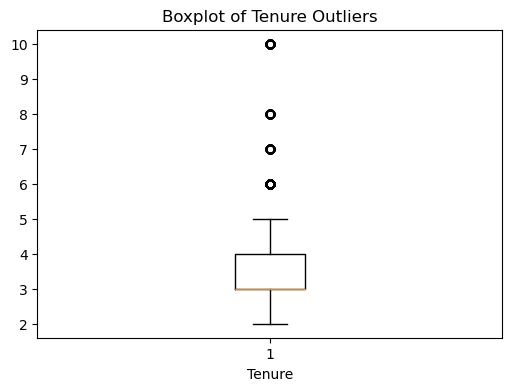

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,4))
plt.boxplot(hr1['tenure'])
plt.title('Boxplot of Tenure Outliers')
plt.xlabel('Tenure')
plt.show()

The boxplot above shows that there are outliers in the tenure variable

In [15]:
# Determining the number of rows containing outliers

# Calculate the interquartile range (IQR)
Q1 = hr1['tenure'].quantile(0.25)
Q3 = hr1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


# Find the number of rows containing outliers
outliers = len(hr1[(hr1['tenure'] < lower_limit) | (hr1['tenure'] > upper_limit)])

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'tenure' variable:", outliers)


Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in 'tenure' variable: 824


In [16]:
# Numbers of people who left vs. stayed
print(hr1['left'].value_counts())
print(' ')

# Fractions of people who left vs. stayed
print(hr1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
 
0    0.833959
1    0.166041
Name: left, dtype: float64


#### Data visualizations

To create plots to visualize relationships between variables in the data,I will create a boxplot showing [average_monthly_hours] distributions for [number_project], comparing the distributions of employees who stayed versus those who left.

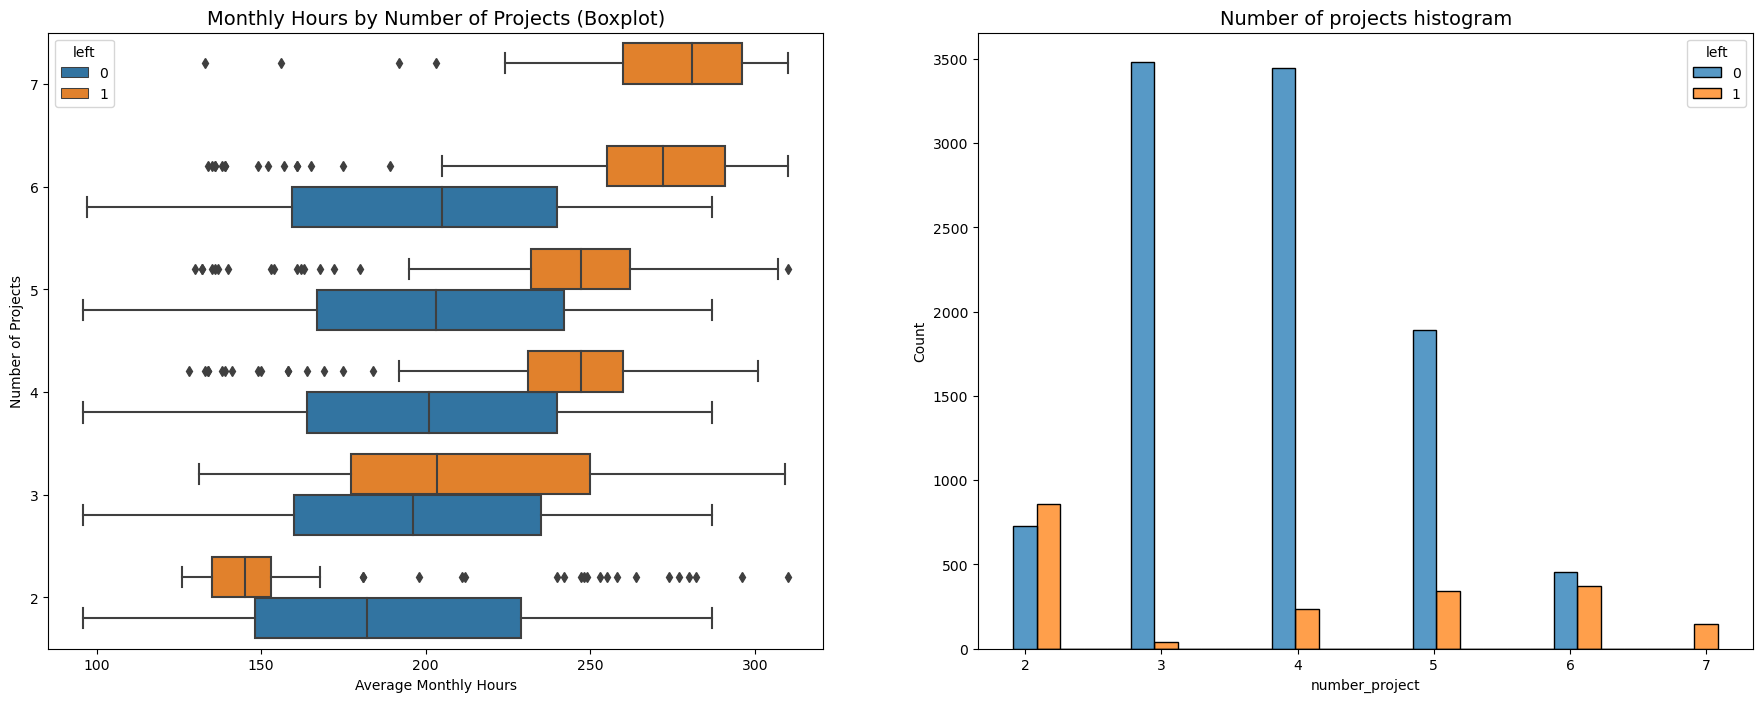

In [17]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=hr1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel("Average Monthly Hours")
ax[0].set_ylabel("Number of Projects")
ax[0].set_title('Monthly Hours by Number of Projects (Boxplot)', fontsize=14)


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = hr1[hr1['left']==0]['number_project']
tenure_left = hr1[hr1['left']==1]['number_project']
sns.histplot(data=hr1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### Insights

Working on multiple tasks may lead to longer hours. The average hours of each group (stayed and left) increases with project number.

From the diagrams, I can extrapolate that they are there are two distinct groups in the organisation. (A) Those who worked less than their counterparts with the same number of projects, and (B) those who worked more than their counterparts with the same number of projects. Group A may have been sacked or quit. This category may also include employees who gave notice and were given less hours since they were leaving. Group B would likely quit due to burn out. Group B probably contributed the most to their projects.

Everyone with seven projects left the organisation, and the interquartile ranges of this group and those with six projects were ~255–295 hours/week—more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is significantly small for these cohorts.

Assuming 40 hours per week and two weeks of vacation, employees work an average of 166.67 hours per month, indicating overwork among all groups, including those not leaving the company.

In [18]:
# Value counts of employees who stayed and left after 7 projects
stayed = hr1[hr1['number_project'] == 7]['left'].value_counts().get(0, 0)
print("Employees with 7 projects who stayed:", stayed)
print(' ')

left = hr1[hr1['number_project'] == 7]['left'].value_counts().get(1, 0)
print("Employees with 7 projects who left:", left)

Employees with 7 projects who stayed: 0
 
Employees with 7 projects who left: 145


The above output confirms that all employees with 7 projects did leave the company.

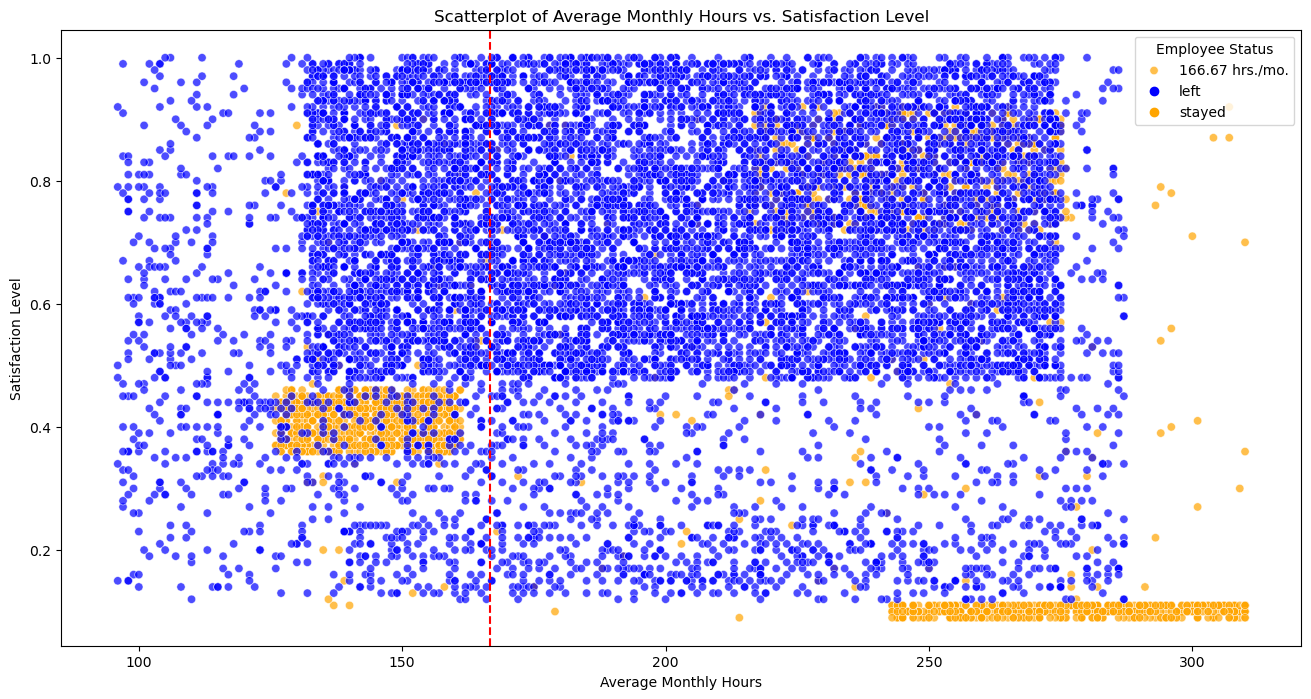

In [19]:
# Create a plot to examine the average monthly hours versus the satisfaction levels.

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the scatterplot
sns.scatterplot(data=hr1, x='average_monthly_hours', y='satisfaction_level', hue='left', palette=["blue", "orange"], alpha=0.7)

# Add a horizontal line at average monthly hours value
plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./mo.')

# Set plot labels and title
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.title("Scatterplot of Average Monthly Hours vs. Satisfaction Level")

# Show the legend
plt.legend(title="Employee Status", labels=['166.67 hrs./mo.', 'left', 'stayed'])

# Display the plot
plt.show()


The output from the scatterplot demonstrates that many employees worked 240–315 hours each month. 315 hours a month is 75 hours per week for a year. Giving reason to why they are probably dissatisfied.

Another group who left was those who worked below the mean working hours. However, their satisfaction was only 0.4. Why they left is unknown. They may have felt driven to work extra because so many of their colleagues did. That pressure may have affected their sense of satisfaction.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. The group is somewhat scattered unlike others and suggets some data manipultion might have taken place.

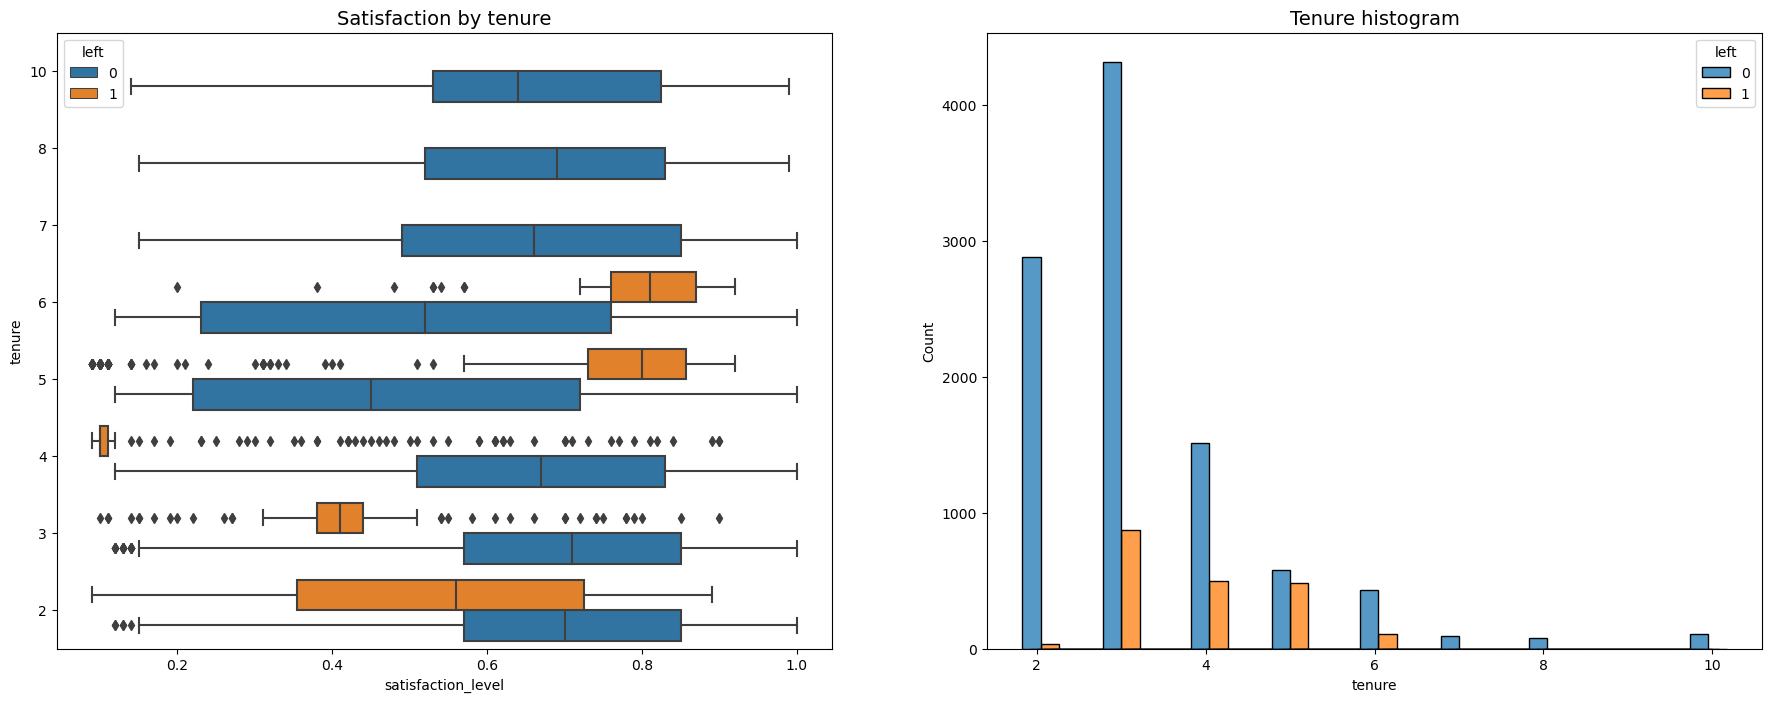

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=hr1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = hr1[hr1['left']==0]['tenure']
tenure_left = hr1[hr1['left']==1]['tenure']
sns.histplot(data=hr1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

Observations from the plot.

Dissatisfied short-term employees and very satisfied medium-term employees left the company.

Four-year employees who quit look exceptionally dissatisfied. If possible. investigate company policy modifications that may have affected people at four years.

Long-term workers stayed. They were satisfied like newer employees who stayed.

The histogram reveals few long-term employees. They may be higher-ranking, higher-paid personnel.

In [21]:
# Grouping the DataFrame by 'left' column and calculating the mean and median satisfaction scores for each group

hr1.groupby('left')['satisfaction_level'].aggregate(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employees who left have lower mean and median satisfaction levels than those who stayed. Surprisingly, those who stayed had a mean satisfaction score below the median. This suggests that those who stayed may be less satisfied. As the graph is skewed to the left.

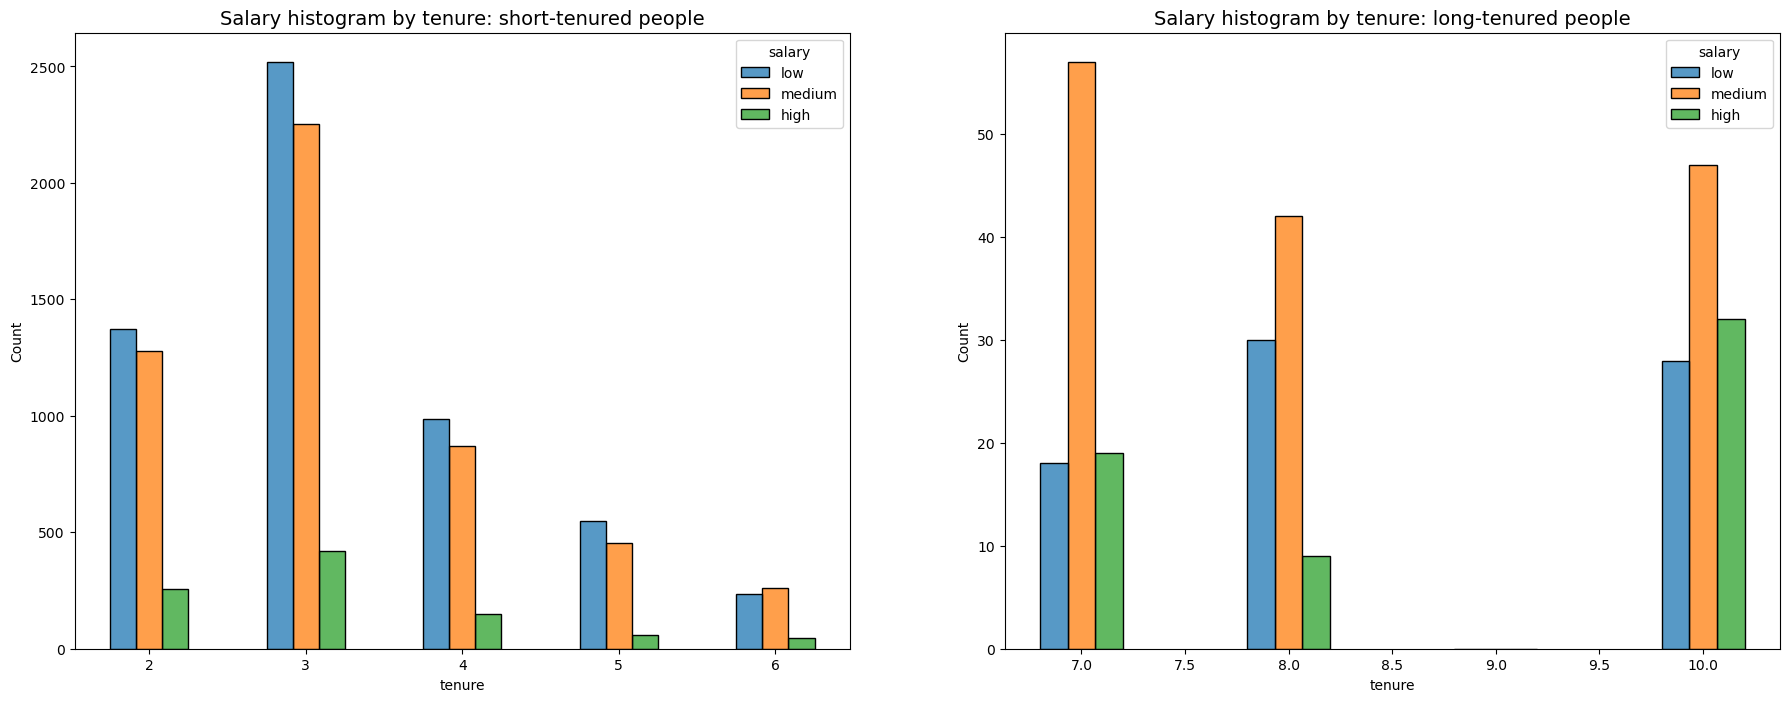

In [22]:
# Creating  plots to examine salary levels for different tenures.

# Define short-tenured employees
tenure_short = hr1[hr1['tenure'] < 7]

# Define long-tenured employees
tenure_long =hr1[hr1['tenure'] > 6]

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = hr1[hr1['tenure'] < 7]

# Define long-tenured employees
tenure_long = hr1[hr1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

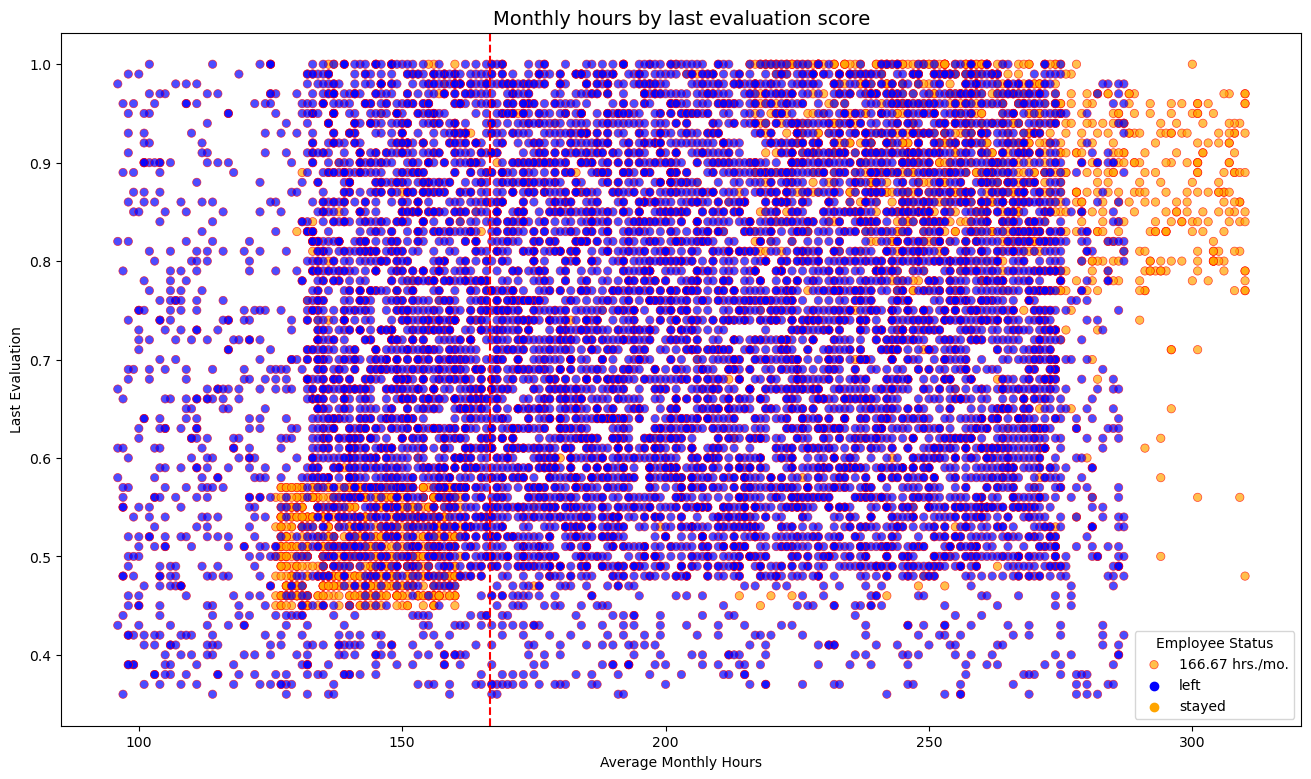

In [23]:
# Create a plot to explore whether there's a correlation between working long hours and receiving high evaluation scores

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
# Set the figure size
plt.figure(figsize=(16, 9))

# Create scatterplot of average_monthly_hours versus last_evaluation
sns.scatterplot(data=hr1, x='average_monthly_hours', y='last_evaluation', hue='left', palette=['blue', 'orange'],
                edgecolor='red', linewidth=0.5, alpha= 0.7)
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')

# Add a horizontal line at average monthly hours value
plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./mo.')

# Show the legend
plt.legend(title="Employee Status", labels=['166.67 hrs./mo.', 'left', 'stayed'])

# Display the plot
plt.show()

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. There seems to be a correlation between hours worked and evaluation score. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score. Most of the employees in this company worked well over 167 hours per month.

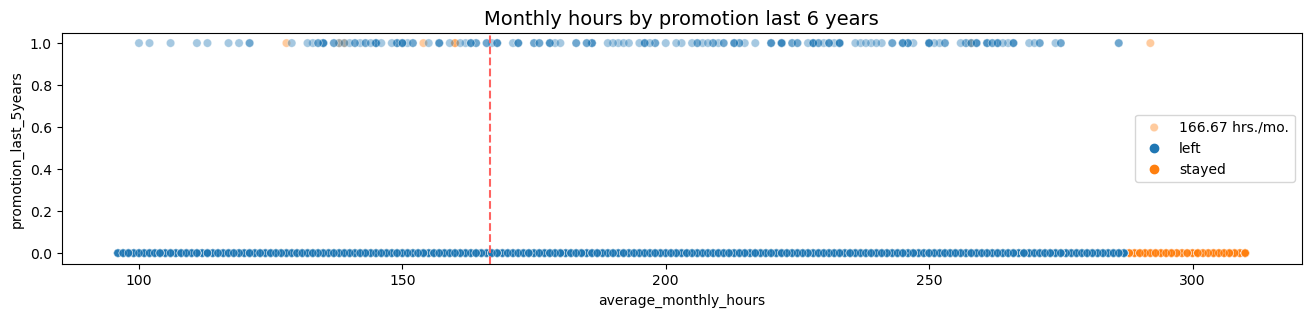

In [24]:
# Create a plot to examine whether employees who worked very long hours were promoted in the last six years.
### YOUR CODE HERE ###

# Set the figure size

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_6years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=hr1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 6 years', fontsize='14');

The plot above shows the following:

Very few employees who were promoted in the last five years left 
Very few employees who worked the most hours were promoted 
All of the employees who left were working the longest hours Next, you could inspect how the employees who left are distributed across departments.

In [25]:
# Display counts for each department
hr1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

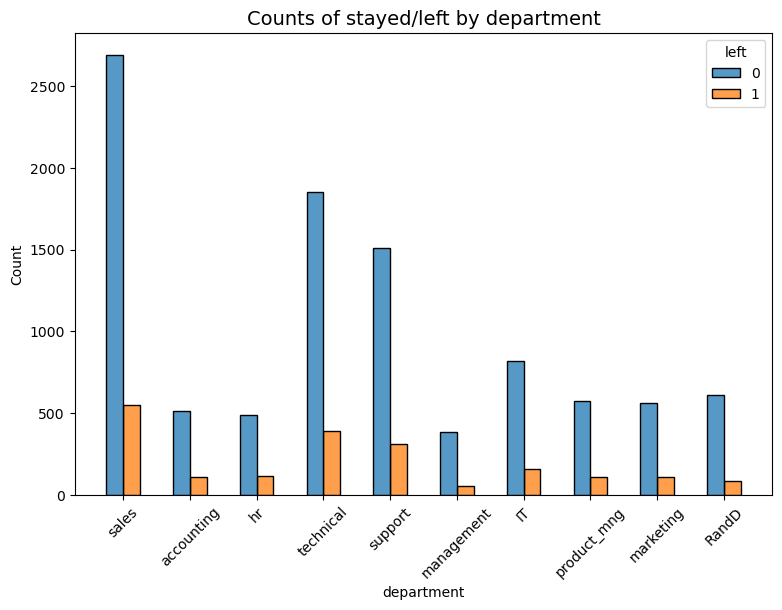

In [26]:
# Create a histogram to compare department distribution for employees who left and stayed
plt.figure(figsize=(9, 6))
sns.histplot(data=hr1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

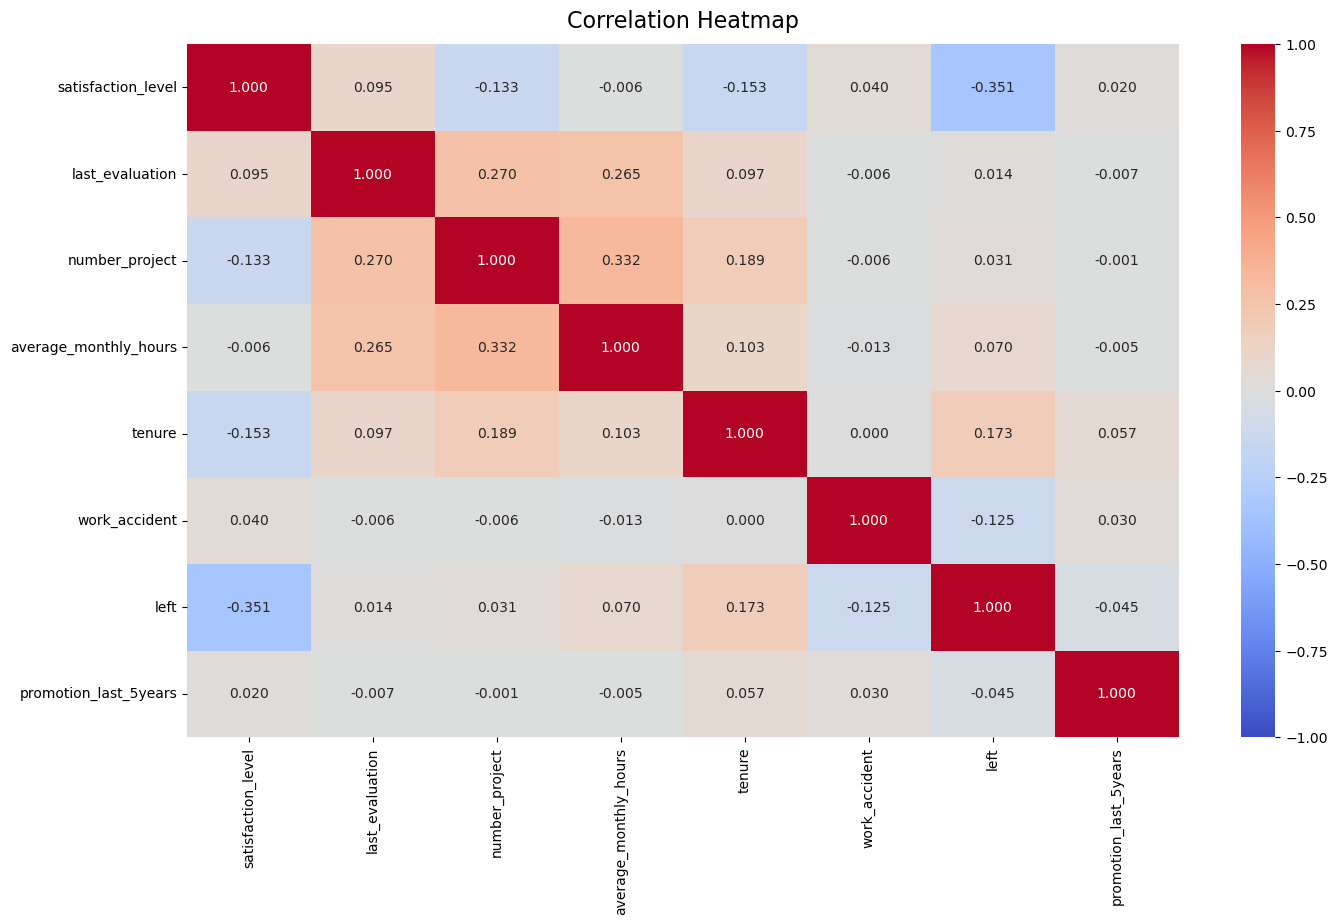

In [27]:
# Create a plot to check for strong correlations between variables in the data.
### YOUR CODE HERE ###

# Calculate the correlation matrix for numeric columns
# correlation_matrix = hr1.corr()

# Set the figure size
plt.figure(figsize=(16, 9))

# Plot the correlation heatmap
sns.heatmap(hr1.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap', fontsize=16, pad=12)

# Display the plot
plt.show()


The correlation heatmap verifies that the number of projects, monthly hours, and evaluation scores all have a positive correlation with one another, and that an employee's satisfaction level is negatively correlated with their likelihood of leaving.

### Insights

It appears that employees are leaving the organisation due to ineffective management. Leaving is associated with longer working hours, many projects, and generally lower levels of satisfaction. It can be demoralising to work lengthy hours without receiving promotions or favourable evaluations. Significant numbers of employees at this company are likely exhausted. Furthermore, it appears that employees who have spent more than six years at the company are less likely to depart.

### Step 3. Model Building, Step 4. Results and Evaluation
Fit a model that predicts the outcome variable using two or more independent variables
Check model assumptions
Evaluate the model

### Identification the type of prediction task.

The goal of this project is to predict whether an employee leaves the company, which is a categorical outcome variable. Hence, this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

#### Logistic regression

Before splitting the data,I will encode the non-numeric variables. There are two: (department and salary). department is a categorical variable, salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [28]:
# Copy the dataframe
df_enc = hr1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


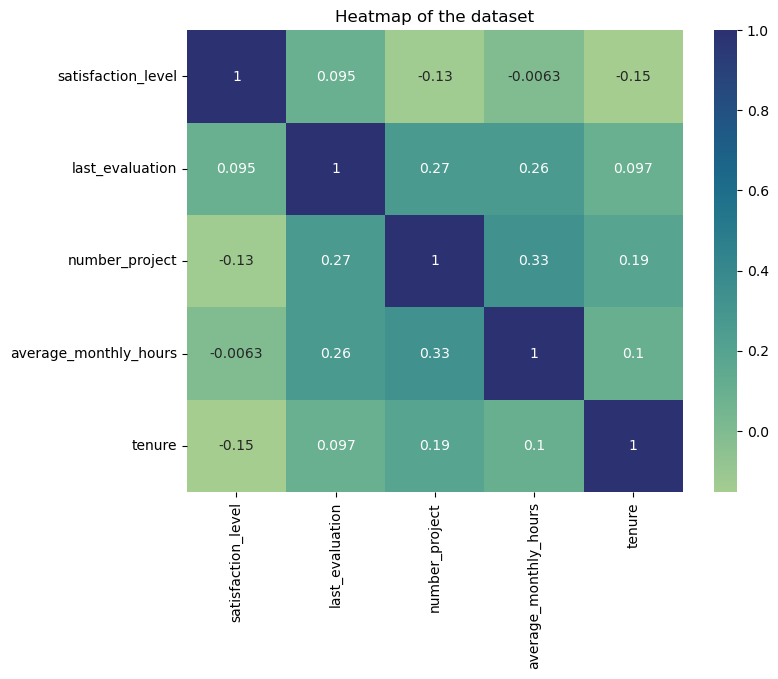

In [29]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

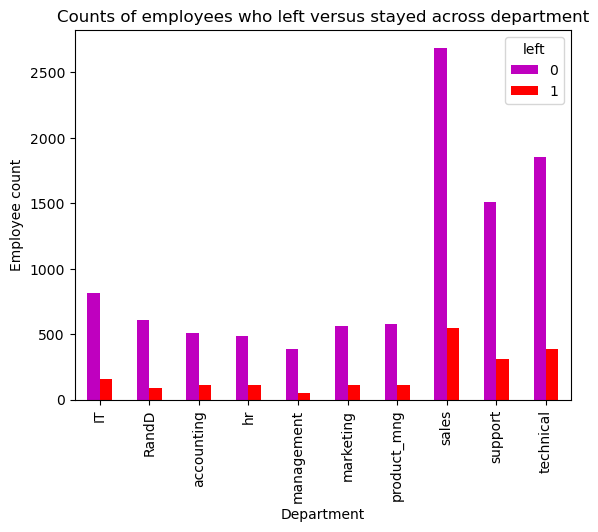

In [30]:
# Create a bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(hr1['department'], hr1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Due to the sensitivity of logistic regression to outliers, it would be prudent at this juncture to eliminate the previously identified outliers in the tenure column.

In [31]:
# Selecting rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [33]:
# Selecting the features i want to use in the model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Spliting the data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [35]:
# Constructing a logistic regression model and fit it to the training dataset

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [36]:
# Use the logistic regression model to get predictions on the test set

y_pred = log_clf.predict(X_test)

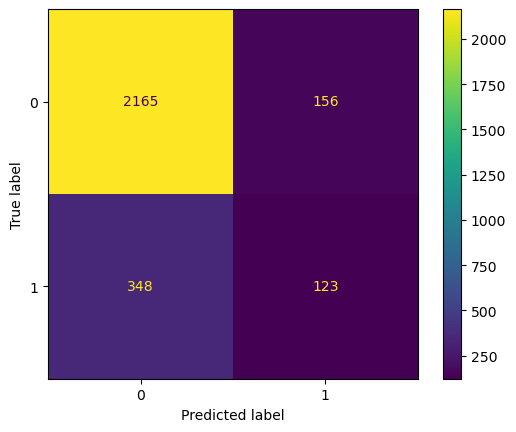

In [37]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [38]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. 

In [39]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Conclusion, Recommendations, Next Steps

The following recommendations would be presented to stakeholders in order to retain employees:

Limit the number of projects employees can simultaneously work on. Consider promoting employees who have been with the company for at least four years, or investigate why employees with a four-year tenure are so dissatisfied.

Either compensate workers for working extended hours, or do not require it. 

Inform employees if they are unfamiliar with the company's overtime pay policies. If the workload and time off expectations are not explicit, make them so. 

Conduct company-wide and team-specific discussions to comprehend and address the company's work culture, both generally and in particular contexts. 

High evaluation scores should not be designated for workers who put in 200 or more hours per month. Consider a proportional scale for rewarding employees with greater contributions/efforts.

##### Next Steps 

It may still be reasonable to be concerned about data leakage. When [last_evaluation] is removed from the data, it may be prudent to consider how predictions change. In the event that evaluations are not conducted frequently, it would be advantageous to be able to predict employee retention without this factor. It is also possible that the evaluation score determines whether an employee remains or departs, in which case it would be advantageous to pivot and attempt to predict performance score. The same holds true for customer satisfaction.